# Ejemplo Multiplicación
Este ejemplo pretende mostrar como la KAN es capaz de representar la multiplicación entre dos valores.

Lo interesante de este ejemplo es que la KAN es capas de aproximar una función $f(x_1, x_2)=x_1x_2$ utilizando funciones de una variable y la función multivariable suma.

In [150]:
from kan import *

# Permite utilizar CPU o GPU según las características del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Definimos la estructura de la KAN
model = KAN(width=[2,2,1], grid=3, k=3, seed=1, device=device, auto_save=False)

# Definimos la función que queremos aproximar y generamos el conjunto de datos en consecuencia
f = lambda x: x[:,0]*x[:,1]
dataset = create_dataset(f, n_var=2, device=device)

In [151]:
# Entrenamos el modelo utilizando el optimizador LBFGS
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 1.27e-03 | test_loss: 1.22e-03 | reg: 7.70e+00 | : 100%|█| 20/20 [00:04<00:00,  4.99it


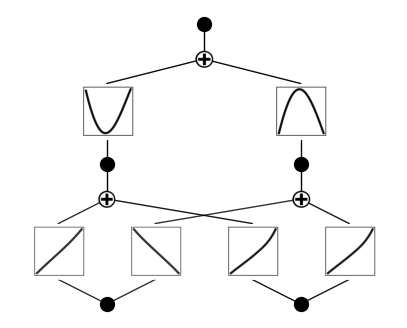

In [152]:
# Mostramos la forma que tiene la KAN
model.plot()

In [153]:
# Ajustamos las funciones de activación de manera simbólica
model.fix_symbolic(0,0,0,'x')
model.fix_symbolic(0,0,1,'x')
model.fix_symbolic(0,1,0,'x')
model.fix_symbolic(0,1,1,'x')
model.fix_symbolic(1,0,0,'x^2')
model.fix_symbolic(1,1,0,'x^2')

Best value at boundary.
r2 is 0.9989265203475952
r2 is 0.9996203780174255
r2 is 0.9860721826553345
r2 is 0.9878092408180237
r2 is 0.9838635325431824
r2 is 0.9895995259284973


tensor(0.9896, device='cuda:0')

In [154]:
# Volvemos a entrenar el modelo
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 8.50e-08 | test_loss: 8.67e-08 | reg: 0.00e+00 | : 100%|█| 20/20 [00:02<00:00,  9.41it


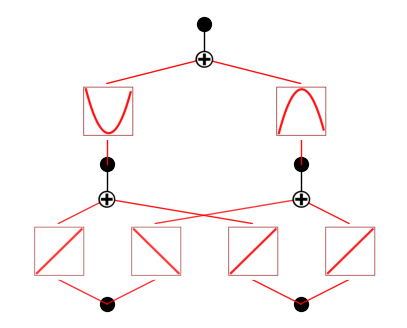

In [155]:
# Mostramos el modelo tras el nuevo entrenamiento
# El color rojo indica que las funciones de activación ya no son splines, son funciones simbólicas
model.plot()

In [156]:
# Obtenemos la fórmula final
formula = model.symbolic_formula()[0][0]
formula = ex_round(formula, 4)
display(formula)

0.3349*(-0.7465*x_1 - x_2)**2 - 0.3349*(0.7465*x_1 - x_2)**2

In [157]:
simplify(formula)

1.0*x_1*x_2

La expresión obtenida se corresponde con $xy$, que es el valor esperado.